In [ ]:
# Exploratory Data Analysis on Netflix Movies & TV Shows

## Objective
The objective of this project is to perform Exploratory Data Analysis (EDA) on the
Netflix Movies and TV Shows dataset to understand content distribution, trends,
and patterns using data visualization and statistical analysis.

## Tools Used
- Python
- Jupyter Notebook
- Pandas
- Matplotlib
- Seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Display first 5 rows
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [2]:
# Dataset shape
df.shape

# Dataset info
df.info()

# Statistical summary
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
count,5.837000e+03,5837,3936,5281,5410,5195,5837.000000,5827,5837,5837,5837,5837
unique,NaN,5780,3108,5087,527,1092,NaN,14,194,449,5829,2
top,NaN,Tunnel,"Raúl Campos, Jan Suter",David Attenborough,United States,"November 1, 2019",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...,Movie
freq,NaN,3,18,18,1907,94,NaN,1937,1259,297,3,3939
mean,7.730079e+07,NaN,NaN,NaN,NaN,NaN,2013.688539,NaN,NaN,NaN,NaN,NaN
std,9.479777e+06,NaN,NaN,NaN,NaN,NaN,8.419088,NaN,NaN,NaN,NaN,NaN
min,2.698800e+05,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,NaN
25%,8.004520e+07,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN
50%,8.016353e+07,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN
75%,8.024188e+07,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check missing values
df.isnull().sum()


show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [4]:
# Fill missing text values
text_cols = ['director', 'cast', 'country', 'rating']

for col in text_cols:
    df[col] = df[col].fillna('Unknown')


In [5]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check new shape
df.shape


(5837, 12)

In [ ]:
## Data Cleaning Summary

- Missing values in text-based columns were replaced with 'Unknown'.
- The `date_added` column was converted to datetime format for time-based analysis.
- Duplicate records were identified and removed to ensure data integrity.

These steps prepare the dataset for accurate exploratory analysis.


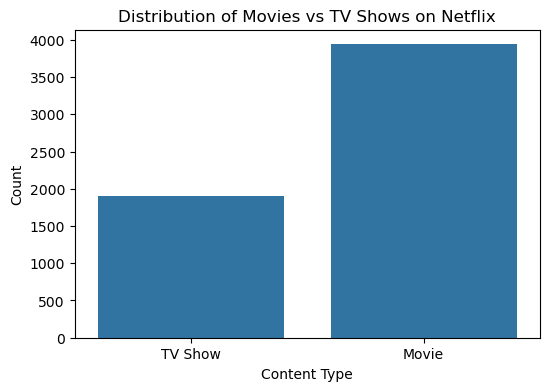

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


In [ ]:
Netflix hosts more Movies than TV Shows, indicating a stronger focus
on movie-based content compared to episodic series.


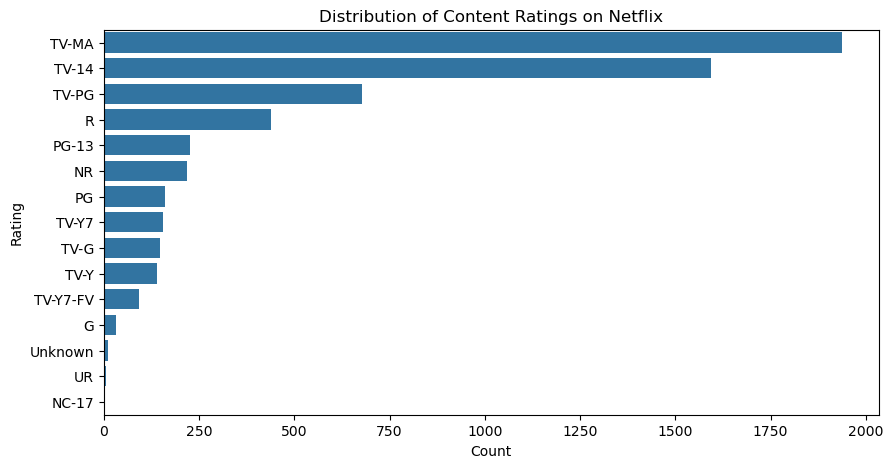

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


In [ ]:
The most common ratings suggest Netflix primarily targets mature and
teen audiences, with TV-MA and TV-14 content being dominant.


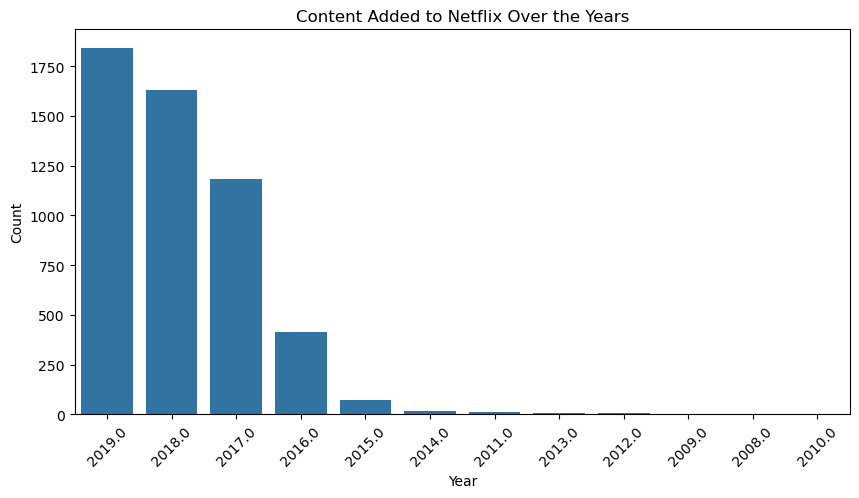

In [9]:
# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', order=df['year_added'].value_counts().index)
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Netflix experienced rapid content growth in recent years,
highlighting aggressive platform expansion.


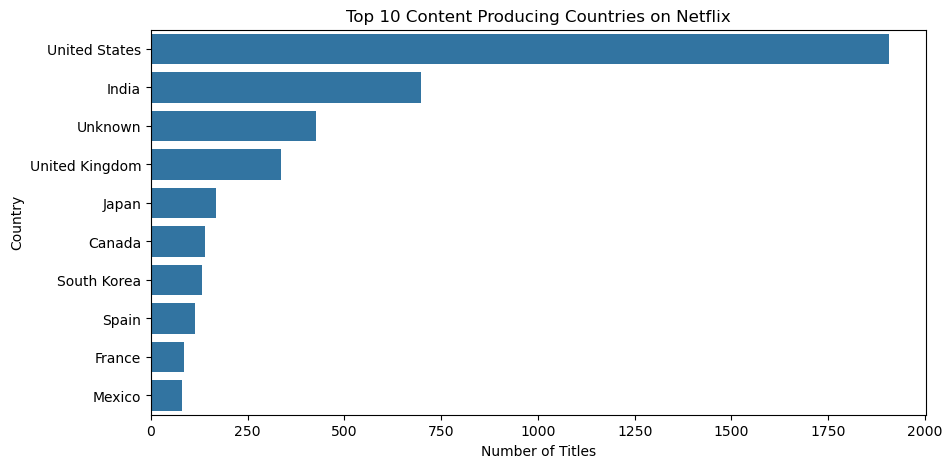

In [10]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


In [ ]:
The United States dominates Netflix content production,
followed by India and the United Kingdom.


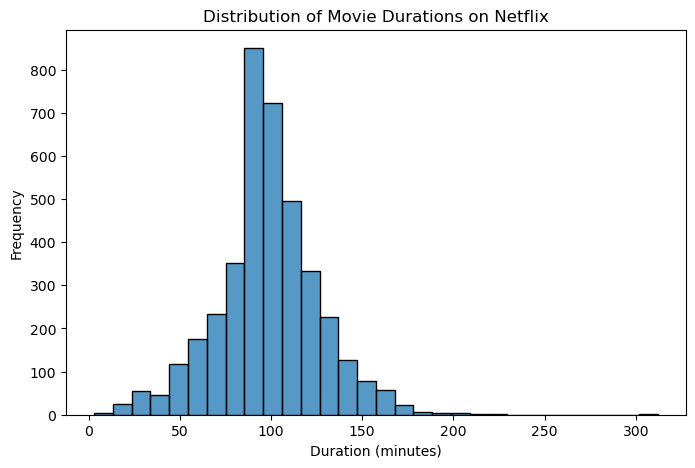

In [11]:
# Filter movies safely
movies = df.loc[df['type'] == 'Movie'].copy()

# Extract numeric duration
movies['duration_min'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

plt.figure(figsize=(8,5))
sns.histplot(movies['duration_min'], bins=30)
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Most Netflix movies have durations between 80 and 120 minutes,
which aligns with standard feature film lengths.

Note: A copy of the movie-only dataset was created to safely perform feature extraction
without chained assignment warnings.

In [ ]:
## Summary & Conclusion

In this project, Exploratory Data Analysis (EDA) was performed on the Netflix Movies
and TV Shows dataset to understand content distribution, trends, and patterns.

### Key Observations
- Netflix hosts a larger number of Movies compared to TV Shows, indicating a strong
  focus on movie-based content.
- Mature and teen-rated content (such as TV-MA and TV-14) dominates the platform,
  suggesting a primary focus on older audiences.
- A significant increase in content additions was observed in recent years,
  highlighting Netflix’s rapid expansion strategy.
- The United States is the leading contributor of content, followed by countries
  such as India and the United Kingdom.
- Most movies on Netflix have durations between 80 and 120 minutes, aligning with
  standard feature-length films.

### Conclusion
The analysis provides valuable insights into Netflix’s content strategy, audience
targeting, and global reach. This EDA demonstrates how data cleaning, visualization,
and interpretation can be used to extract meaningful information from real-world
datasets.

This project successfully fulfills the Week-1 task requirements by applying
data handling and exploratory analysis techniques using Python and Jupyter Notebook.